In [3]:
import numpy as np

In [5]:
!pip install tensorflow

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


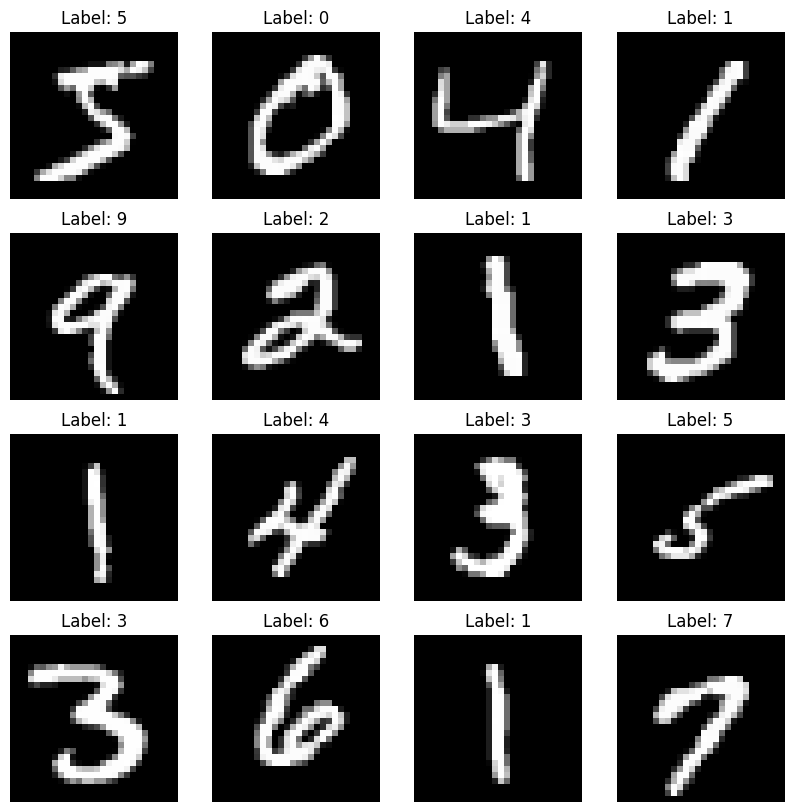

In [ ]:
import matplotlib.pyplot as plt

# Display a grid of 16 images with their corresponding labels
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [6]:
# Reshape and normalize the images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

In [7]:
# Convert class labels to one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [10]:
# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Train the model
model.fit(train_images, train_labels,
          batch_size=32,
          epochs=10,
          validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 [==============================] - 47s 30ms/step - loss: 0.1630 - accuracy: 0.9498 - val_loss: 0.0654 - val_accuracy: 0.9791
Epoch 2/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.0444 - val_accuracy: 0.9862
Epoch 3/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.0515 - val_accuracy: 0.9843
Epoch 4/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 5/10
1500/1500 [==============================] - 44s 30ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0403 - val_accuracy: 0.9889
Epoch 6/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0445 - val_accuracy: 0.9877
Epoch 7/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0494 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0424 - accuracy: 0.9889
Test accuracy: 0.9889000058174133


In [ ]:
# Predict on the test set
predictions = model.predict(test_images)


313/313 [==============================] - 3s 8ms/step


In [ ]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(test_labels, axis=1), np.argmax(predictions, axis=1))
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[ 974    0    4    0    0    0    0    1    1    0]
 [   0 1133    0    1    0    0    1    0    0    0]
 [   0    0 1024    0    1    0    0    6    1    0]
 [   0    0    1 1004    0    3    0    0    2    0]
 [   0    0    0    0  976    0    1    0    1    4]
 [   2    0    0    6    0  879    1    1    3    0]
 [   4    2    2    0    2    2  946    0    0    0]
 [   0    3   10    0    0    0    0 1014    1    0]
 [   4    1    3    2    0    2    0    4  957    1]
 [   0    2    1    1    7    6    0    7    3  982]]


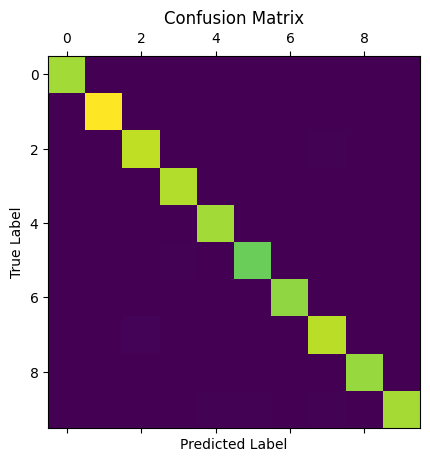

In [ ]:
# Visualize the confusion matrix using matplotlib or other libraries
import matplotlib.pyplot as plt

plt.matshow(cm)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()